## <b>Experimentação</b>

<div style="text-align:justify">
Este notebook traz boas práticas, cuidados e métodos para desenho e realização de experimentos. Estas informações são abrangentes e podem ser aplicadas a qualquer tipo de experimento, incluindo experimentos em produtos digitais.
<br/><br/>
<code><i>Um experimento é um procedimento planejado para obter novos fatos, negar ou confirmar hipóteses ou resultados obtidos anteriormente</i></code>. O método experimental consiste em modificar uma variável e averiguar os efeitos em uma segunda variável, dita <code>variável dependente</code>. Uma <code>variável dependente</code> é qualquer coisa que possa sofrer algum tipo de efeito em função de outra variável, dita <code>variável independente</code>.
<br/><br/>
Ex: <code><i>Você mexe no preço (variável independente) de um produto e os efeitos poderão ser observados no volume de vendas e na margem de lucro desse produto (variáveis dependentes)</i></code>.
</div>

Organização do conteúdo:

- Conceitos
- Erro experimental
- Etapas do planejamento
- Teste A|B convencional
- Teste A|B alternativos

### <b>Conceitos</b>:

> #### Tratamento (<i>Variável Independente</i>)
<br/>
> <div style="text-align:justify">
Um tratamento é uma condição imposta a um elemento que se deseja medir ou avaliar em um experimento, para causar o efeito esperado.
<br/><br/>
Ex: <code><i>Para aumentar o número de usuários no aplicativo, <b>vamos simplificar o fluxo de onboarding</b></i></code>.
</div>

> #### Unidade Experimental
<br/>
> <div style="text-align:justify">
Onde é feita a aplicação do tratamento. É a unidade experimental que fornece os dados a serem avaliados.
<br/><br/>
Ex: <code><i>Para aumentar o número de <b>usuários</b> no aplicativo, vamos simplificar o fluxo de onboarding</i></code>.
</div>

> #### Hipótese Alternativa (<i>Variável Resposta / Dependente</i>)
<br/>
> <div style="text-align:justify">
Elemento sensibilizado em função do tratamento dado.
<br/><br/>
Ex: <code><i>Para <b>aumentar o número de usuários no aplicativo</b>, vamos simplificar o fluxo de onboarding</i></code>.
</div>

> #### Hipótese Nula
<br/>
> <div style="text-align:justify">
É o baseline a ser comparado com a <code>hipótese alternativa</code>.
<br/><br/>
Ex: <code><i>Fluxo atual de onboarding</i></code>.
</div>

### <b>Erro Experimental</b>

<div style="text-align:justify">
Todo experimento está exposto a fatores externos que podem causar variações de um mesmo tratamento. Existem diversos métodos para mitigar o erro experimental, desde <code>aumentar o tamanho da amostra</code>, até <code>repetir o experimento</code> com o objetivo de reproduzir os resultados. Uma prática bastante comum é <i>aplicar o tratamento da hipótese nula em uma variante de teste</i>.
<br/><br/>
A avaliação dos resultados passa por validar estatisticamente os resultados das variantes de teste, uma contra a outra, a partir da variável resposta definida. Veja o exemplo a seguir:
</div>

#### Exemplo

<div style="text-align:justify">
Você é responsável pelo aplicativo de uma grande operadora de TV por assinatura e precisa maximizar o número de usuários que utiliza o app. Para isso você vai aplicar como tratamento <i>uma simplificação no fluxo de onboarding do app</i> e vai utilizar como variável resposta o <i>número de usuários que executou pelo menos uma ação de gatilho</i> através do app. As ações de gatilho são: <code>segunda via de boleto</code> e <code>visita técnica</code>.
<br/><br/>
A seguir vamos criar os dados para simular a execução desse experimento:
</div>

In [1]:
import pandas
from scipy import stats

df = pandas.DataFrame(data = {
    'dia': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'alternativa_a1': [625, 636, 627, 634, 636, 650, 636, 635, 635, 636],
    'alternativa_a2': [634, 633, 625, 636, 630, 653, 638, 637, 637, 638],
    'alternativa_b': [620, 650, 652, 630, 655, 663, 660, 662, 662, 663]
})

df.head(10)

,dia,alternativa_a1,alternativa_a2,alternativa_b
0,1,625,634,620
1,2,636,633,650
2,3,627,625,652
3,4,634,636,630
4,5,636,630,655
5,6,650,653,663
6,7,636,638,660
7,8,635,637,662
8,9,635,637,662
9,10,636,638,663


Para esse experimento, assumimos o seguinte planejamento:

- 1000 usuários distintos em cada variante do experimento (3000 usuários ao todo).
- Colocamos duas variantes de teste com o tratamento da hipótese nula (a1 e a2).
- Vamos validar apenas um tratamento de hipótese alternativa (b).
- O experimento foi executado por 10 dias.

#### Critério de Parada

<div style="text-align:justify">
O critério de parada de um experimento depende de sua estabilidade. Idealmente, devemos observar pelo menos cinco pontos consecutivos de estabilidade para assumir que um experimento foi concluído.
</div>

<AxesSubplot:>

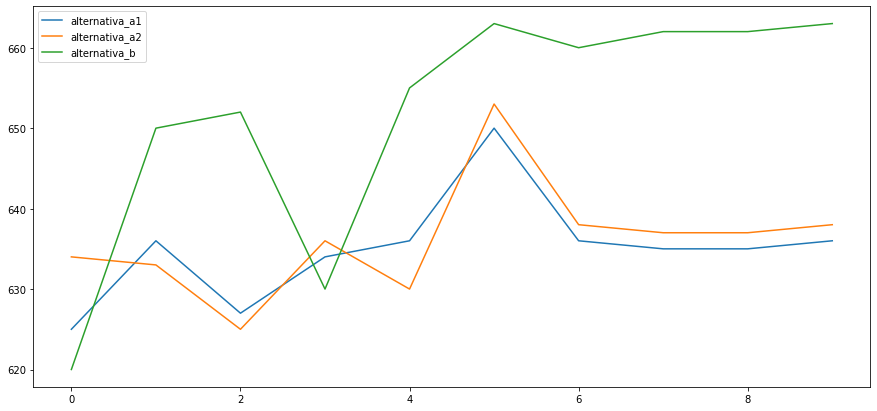

In [86]:
from matplotlib import pyplot
pyplot.rcParams['figure.figsize'] = (15, 7)

df.drop(['dia'], axis=1).plot.line()

#### Variável Resposta

In [87]:
a = df.alternativa_a1
a2= df.alternativa_a2
b = df.alternativa_b

u'Alternativa A1: {} - Alternativa A2: {} - Alternativa B: {}'.format(a.sum(), a2.sum(), b.sum())

'Alternativa A1: 6350 - Alternativa A2: 6361 - Alternativa B: 6517'

#### Hipótese Nula vs Hipótese Nula

<div style="text-align:justify">
Observando o <i>p-Value</i> do teste de hipótese entre as alternativas a1 e a2, notamos que não produziu uma significância estatística relavante (p-Value > 0.05). Isso era de esperar, pois as alternativas a1 e a2 aplicam o mesmo tratamento.
<br/><br/>
Se o teste de hipótese entre estas alternativas apresentasse significância estatística, estaríamos lidando com um erro experimental. Neste caso, deveríamos repetir o experimento com uma amostra maior de usuários.
</div>

In [88]:
'p-Value: %.5f' % (stats.ttest_ind(a, a2)[1])

'p-Value: 0.72653'

#### Hipótese Nula vs Hipótese Alternativa

<div style="text-align:justify">
Observando o <i>p-Value</i> do teste de hipótese entre as alternativas a1 e b, notamos que produziu uma significância estatística relavante (p-Value < 0.05). Isso significa que o tratamento dado produziu algum resultado na variável resposta.
<br/><br/>
Se observarmos a variável resposta de cada alternativa, veremos que a Alternativa B atingiu o objetivo em 167 unidades experimentais a mais, indicando que o tratamento dado foi efetivo.
</div>

In [89]:
'p-Value: %.5f' % (stats.ttest_ind(a, b)[1])

'p-Value: 0.00474'

### <b>Etapas do Planejamento</b>

- Conhecer o problema
- Escolher a variável resposta
- Escolher os fatores e níveis
- Desenhar o experimento (repetições / amostra, tratamentos, etc)
- Condução (monitoramento de fatores externos que possam afetar seus resultados)
- Análise de dados e aprendizados
- Conclusões e recomendações (um experimento é o meio para algo, não o fim)

### <b>Teste A|B - Convencional</b>

- Amostragem aleatória
- Separação em hipótese nula e variantes com novos tratamentos
- Variável resposta binomial
- Avaliação do experimento por p-Value e intervalo de confiança

#### Google Firebase - Serviço

Imagem 1

<img src="images/img_01.png" />

#### Google Firebase - Identificação

Imagem 2

<img src="images/img_02.png" />

#### Google Firebase - Desenho

Imagem 3

<img src="images/img_03.png" />

#### Google Firebase - Variável Resposta

Imagem 4

<img src="images/img_04.png" />

#### Google Firebase - Variantes de Teste

Imagem 5

<img src="images/img_05.png" />

### <b>Teste A|B - Alternativas</b>

- <a href="http://blog.analytics-toolkit.com/2017/statistical-significance-non-binomial-metrics-revenue-time-site-pages-session-aov-rpu/">Métricas não binomiais</a>
- <a href="https://reflectivedata.com/comprehensive-guide-to-statistics-in-a-b-testing/">Métodos Bayesianos</a>
- <a href="https://sease.io/2020/05/online-testing-for-learning-to-rank-interleaving.html">Interleaving</a>
- <a href="https://math.montana.edu/jobo/st541/sec3c.pdf">Latin Square</a>
- <a href="https://www.codemotion.com/magazine/dev-hub/designer-cxo/multi-armed-bandits-a-better-way-to-a-b-test/">Multi-armed bandits</a>